Shape of padded sequences: (104, 100)
Epoch 1/10


c:\Users\Marc Jay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 416ms/step - accuracy: 0.4747 - loss: 0.6932 - val_accuracy: 0.7143 - val_loss: 0.6924
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7641 - loss: 0.6908 - val_accuracy: 0.6667 - val_loss: 0.6916
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8435 - loss: 0.6874 - val_accuracy: 0.5238 - val_loss: 0.6916
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8728 - loss: 0.6817 - val_accuracy: 0.5238 - val_loss: 0.6912
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9868 - loss: 0.6729 - val_accuracy: 0.5238 - val_loss: 0.6906
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9920 - loss: 0.6582 - val_accuracy: 0.5238 - val_loss: 0.6916
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9920 - loss: 0.6369 - val_accuracy: 0.4762 - val_loss: 0.6940
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.6004 - val_accuracy: 0.4762 - val_loss: 0.7014


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     5,161,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100, 64)        │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,650,105 (59.70 MB)

 Trainable params: 5,216,701 (19.90 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,433,404 (39.80 MB)

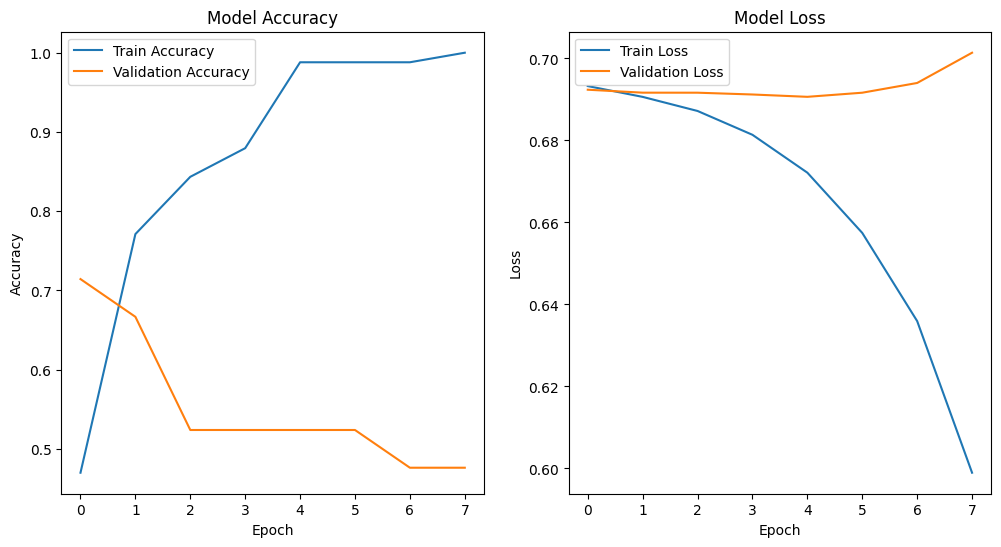

In [1]:
import pandas as pd
import re
import numpy as np
import json
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Load your Lovecraft dataset
lovecraft_data = pd.read_csv('data/lovecraft_fiction.csv')

# Clean text data (e.g., remove special characters, convert to lowercase)
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetical characters
    return text

# Apply cleaning function to the data
cleaned_texts = lovecraft_data['Text'].apply(clean_text)

# Tokenization
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(cleaned_texts)
sequences = tokenizer.texts_to_sequences(cleaned_texts)

# Save the tokenizer for future use
with open('data/tokenizer.json', 'w') as f:
    json.dump(tokenizer.to_json(), f)

# Set a max sequence length
max_length = 100  # Or another suitable value depending on your data
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')

# Check the shape of padded sequences
print(f"Shape of padded sequences: {padded_sequences.shape}")

# Split the data into training and validation sets
X_train, X_val = train_test_split(padded_sequences, test_size=0.2, random_state=42)

# Create labels (assuming you're performing a classification task)
y_train = np.random.randint(0, 2, size=(len(X_train),))  # Example: binary classification
y_val = np.random.randint(0, 2, size=(len(X_val),))  # Adjust depending on your task

# Define the model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length),  # Use max_length here
    LSTM(64, return_sequences=True),  # Reduced LSTM units for less complexity
    Dropout(0.3),  # Increased Dropout rate for more regularization
    LSTM(32),  # Reduced LSTM units
    Dense(16, activation='relu'),  # Reduced Dense units
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Implement EarlyStopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Check model summary
model.summary()

# Plot accuracy and loss curves for training and validation
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the plot function after model training
plot_training_history(history)


In [10]:
import json

# Load JSON files
def load_json(file_name):
    with open(f"data/{file_name}", "r") as file:
        return json.load(file)

# Load the creature lists
creatures = load_json("creatures.json")
great_old_ones = load_json("great_old_ones.json")
lesser_old_ones = load_json("lesser_old_ones.json")
outer_gods = load_json("outer_gods.json")
races = load_json("races.json")

def extract_creature_names(creature_list):
    return [creature["name"] for creature in creature_list]

# Combine all creature names into one list
all_creatures = set(
    extract_creature_names(creatures) + 
    extract_creature_names(great_old_ones) + 
    extract_creature_names(lesser_old_ones) + 
    extract_creature_names(outer_gods)
)


# Example text from Lovecraft's works (NER results)
text_entities = [
    ("centuries", "DATE"),
    ("France", "GPE"),
    ("Cthulhu", "PERSON"),
    ("Nyarlathotep", "PERSON"),
    ("Barons", "WORK_OF_ART"),
]

# Check if any entity matches the Lovecraft creatures
# Update the matching part of your code
matched_entities = [entity for entity in text_entities if entity[0].lower() in all_creatures]

print(f"Matched Entities: {matched_entities}")



Matched Entities: [('Cthulhu', 'PERSON'), ('Nyarlathotep', 'PERSON')]


In [11]:
# Initialize an empty list to store matched entities
matched_entities = []

# Example of matching loop
for entity, label in text_entities:
    if entity in all_creatures:
        matched_entities.append((entity, label))

# Print all matched entities
print("Matched Entities:", matched_entities)


Matched Entities: []
